In [1]:
# Importing the Dataset
from sklearn.datasets import load_wine 
import pandas as pd
lw = load_wine() 
df = pd.DataFrame(data = lw.data , columns = lw.feature_names)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
# Checking Null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

<Axes: >

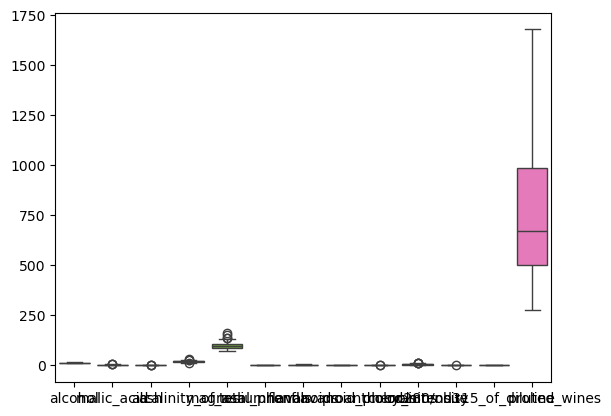

In [3]:
# Detecting Outliers 
import seaborn as sns
sns.boxplot(data=df)

In [4]:
# Handling Outliers 
for col in df.columns :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3- Q1
    lower = Q1+ 1.5*IQR
    upper = Q3 - 1.5*IQR
    df[col] = df[col].clip(lower,upper)

<Axes: >

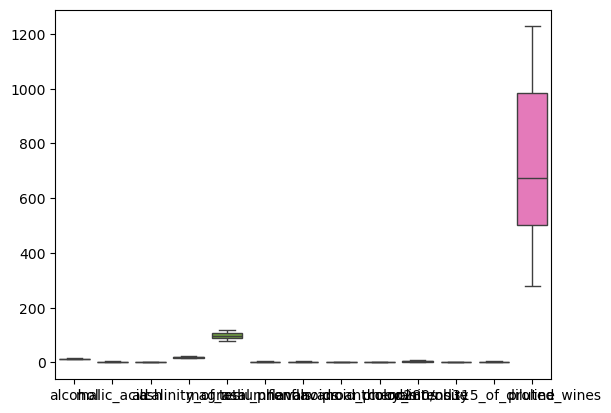

In [5]:
# Outlier results
sns.boxplot(data = df)

In [6]:
# Splitting the Model into the Training and Test sets
from sklearn.model_selection import train_test_split 
X = df 
y = lw.target 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [7]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Training the model using the Decision Tree
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
# Evaluating the Results 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
y_pred = model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))

Accuracy Score:  0.9444444444444444
Confusion Matrix:  [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

